In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import preprocessing

In [3]:
file_path = "/Users/atenafazeli/Desktop/ML/Classisfication /KNN/teleCust1000t.csv"

df = pd.read_csv(file_path)

df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#### Plotting Data

In [4]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

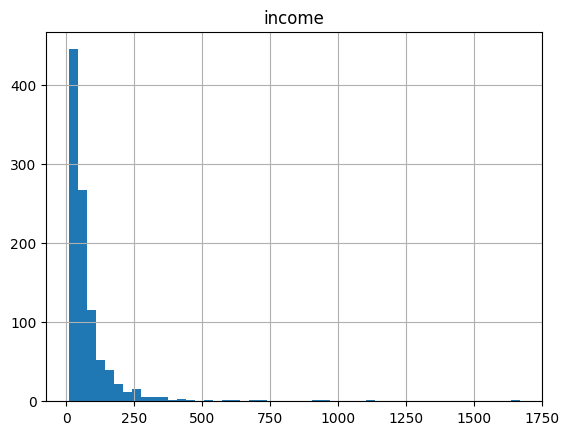

In [5]:
df.hist(column ='income', bins=50)

#### Feature set

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

### to use sklearn library, we have to convert Pandas data frame to a Numpy array

In [7]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [10]:
y = df ['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

#### Data Normalization

In [13]:
scaler = preprocessing. StandardScaler(). fit(x)
x = scaler.transform(x.astype (float))
print (x[0:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


#### Test & Train

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split ( x, y, test_size=0.2, random_state=4)
print ("Train_set:" , x_train.shape, y_train.shape)
print ("Test_set:" , x_test.shape, y_test.shape)

Train_set: (800, 11) (800,)
Test_set: (200, 11) (200,)


#### Train

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

#### Predict

In [25]:
yhat = neigh.predict(x_test)
print (yhat[0:5])
print (y[0:5])

[1 1 3 2 4]
[1 4 3 1 3]


#### Accuracy evaluation

In [27]:
from sklearn import metrics
print ("Train Set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print ("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train Set Accuracy:  0.5475
Test Set Accuracy:  0.32


In [29]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/ np.sqrt(yhat.shape[0])
    
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

#### Plot the model accuracy

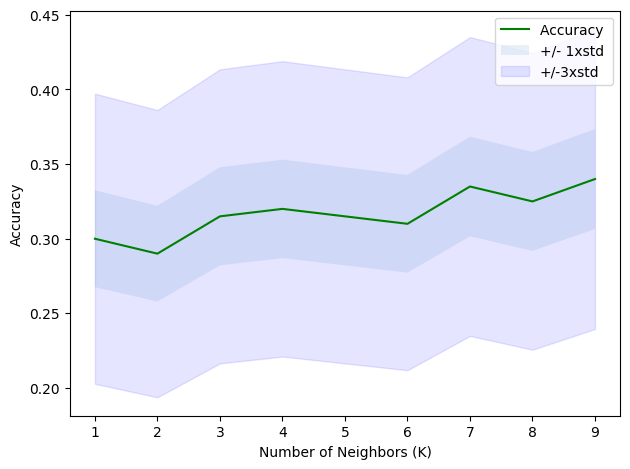

In [30]:
plt.plot(range(1, ks), mean_acc, 'g')
plt.fill_between(range(1, ks), mean_acc-1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.fill_between(range(1, ks), mean_acc-3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.10, color = 'b')
plt.legend (('Accuracy ', '+/- 1xstd', '+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [32]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.34 with k= 9
